In [1]:
from qNetArchitecture import MsPacmanGame, DQN_3HL
import random
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np


In [2]:
# play game 5 times to determine average score 
weightsFile = 'QNET_3HL_policy_net_weights_200epochs.pth'

def testGames(pacmanGame, Ngames = 5, weightFile=''):
  scoreAll = []

  for i in range(Ngames):
      if os.path.isfile(weightFile):
         score, _ = pacmanGame.play(weightsFile=weightFile, show=0)
      else:
        score, _ = pacmanGame.play(show=0)
      print("Game ended with score: ", score)
      scoreAll.append(score)

  averageScore = sum(scoreAll)/Ngames
  return scoreAll, averageScore

In [3]:
## USER DEFINED PARAMETERS:
# Name your model:
name = "QNET_3HL"
# choose a seed for your game:
#seedSet = 42
seedSet = random.randint(0, 100)
# will you be training or just playing?:
trainMode = True
# what type of exploration action selection do you want to use? (will be set to none if not training)
actionSelected = 'greedy'
#actionSelected = 'ucb'
#actionSelected = 'regular'
# type of nn for Q evaluation:
#DQN = DQN_2HL
DQN = DQN_3HL

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Finding Best Learning Rate

In [4]:
# train Q-net by playing the game and learning from trial and error

# testing lr 
lrAll = [0.000001, 0.00001, 0.0001, 0.0005]

trainScores = []
trainErrors = []

testScores = []
averageTestScores = []

Nepochs = 20

for lr in lrAll:
  # initalize new game
  pacmanGame = MsPacmanGame(DQN = DQN)

  # train game
  scoreAll, errorGame = pacmanGame.train(saveName=name + "_lr" + str(lr), actionSelected = actionSelected, epochs=Nepochs, gamma=0.9, eps_start=0.9, eps_end=0.3, eps_decay=5000, tau=0.01, lr=lr, show=0)
  trainScores.append(scoreAll)
  trainErrors.append(errorGame)

  # test how this model works
  testScore, averageScore = testGames(pacmanGame, Ngames=5)

  print("Average score: ", averageScore)

  testScores.append(testScore)
  averageTestScores.append(averageScore)

episode:  0


c:\Users\janas\Documents\ece526_A3\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\janas\Documents\ece526_A3\.venv\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Complete with score:  230.0
episode:  1
Complete with score:  150.0
episode:  2
Complete with score:  160.0
episode:  3
Complete with score:  370.0
episode:  4
Complete with score:  200.0
episode:  5
Complete with score:  200.0
episode:  6
Complete with score:  210.0
episode:  7
Complete with score:  160.0
episode:  8
Complete with score:  400.0
episode:  9
Complete with score:  160.0
episode:  10
Complete with score:  330.0
episode:  11
Complete with score:  510.0
episode:  12
Complete with score:  270.0
episode:  13
Complete with score:  170.0
episode:  14
Complete with score:  170.0
episode:  15
Complete with score:  600.0
episode:  16
Complete with score:  390.0
episode:  17
Complete with score:  240.0
episode:  18
Complete with score:  180.0
episode:  19
Complete with score:  100.0
Game ended with score:  180.0
Game ended with score:  260.0
Game ended with score:  110.0
Game ended with score:  50.0
Game ended with score:  150.0
Average score:  150.0
episode:  0
Complete with score

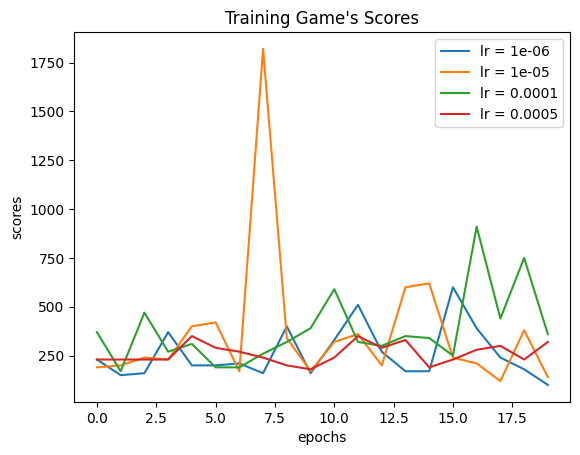

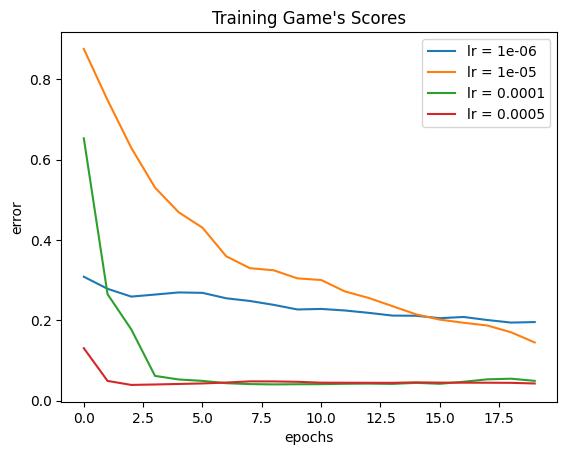

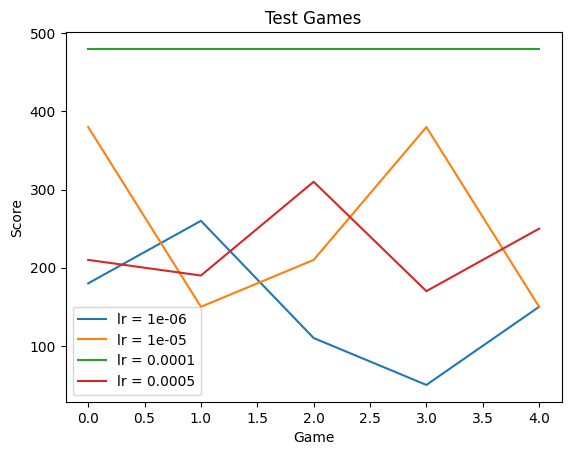

In [5]:
# plot training scores
for i in range(len(lrAll)):
    plt.plot(trainScores[i], label = 'lr = ' + str(lrAll[i]))
plt.xlabel("epochs")
plt.ylabel("scores")
plt.title("Training Game's Scores")
plt.legend()
plt.show()

# plot training errrors
for i in range(len(lrAll)):
    plt.plot(trainErrors[i], label = 'lr = ' + str(lrAll[i]))
plt.xlabel("epochs")
plt.ylabel("error")
plt.title("Training Game's Scores")
plt.legend()
plt.show()

# plot test scores
for i in range(len(lrAll)):
    plt.plot(testScores[i], label = "lr = " + str(lrAll[i]))

plt.xlabel('Game')
plt.ylabel('Score')
plt.title('Test Games')
plt.legend()
plt.show()



Assign best learning rate

In [6]:
lrBest = lrAll[np.argmax(averageTestScores)]

Determine best Gamma (how much to weight future Q values)

In [7]:
gammaAll = [0.2, 0.5, 0.7, 0.9, 0.99]

trainScores = []
trainErrors = []

testScores = []
averageTestScores = []

Nepochs = 20

for gamma in gammaAll:
  # initalize new game
  pacmanGame = MsPacmanGame(DQN = DQN)

  # train game
  scoreAll, errorGame = pacmanGame.train(saveName=name + "_gamma" + str(gamma), actionSelected = actionSelected, epochs=Nepochs, gamma=gamma, eps_start=0.9, eps_end=0.3, eps_decay=5000, tau=0.01, lr=lrBest, show=0)
  trainScores.append(scoreAll)
  trainErrors.append(errorGame)

  # test how this model works
  testScore, averageScore = testGames(pacmanGame, Ngames=5)

  print("Average score: ", averageScore)

  testScores.append(testScore)
  averageTestScores.append(averageScore)

episode:  0
Complete with score:  130.0
episode:  1
Complete with score:  170.0
episode:  2
Complete with score:  160.0
episode:  3
Complete with score:  220.0
episode:  4
Complete with score:  1010.0
episode:  5
Complete with score:  150.0
episode:  6
Complete with score:  180.0
episode:  7
Complete with score:  220.0
episode:  8
Complete with score:  100.0
episode:  9
Complete with score:  360.0
episode:  10
Complete with score:  350.0
episode:  11
Complete with score:  210.0
episode:  12
Complete with score:  300.0
episode:  13
Complete with score:  320.0
episode:  14
Complete with score:  190.0
episode:  15
Complete with score:  200.0
episode:  16
Complete with score:  220.0
episode:  17
Complete with score:  230.0
episode:  18
Complete with score:  120.0
episode:  19
Complete with score:  280.0
Game ended with score:  390.0
Game ended with score:  260.0
Game ended with score:  370.0
Game ended with score:  320.0
Game ended with score:  390.0
Average score:  346.0
episode:  0
Compl

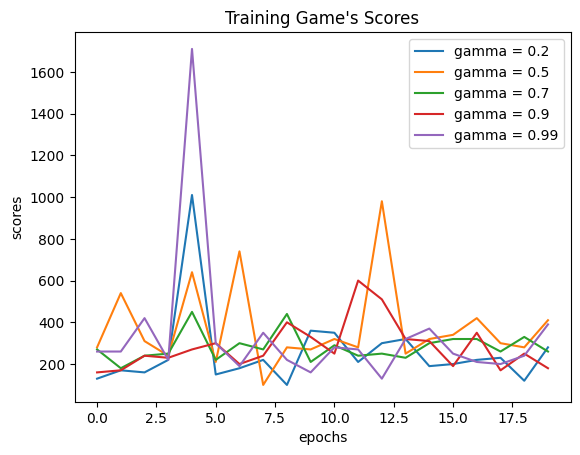

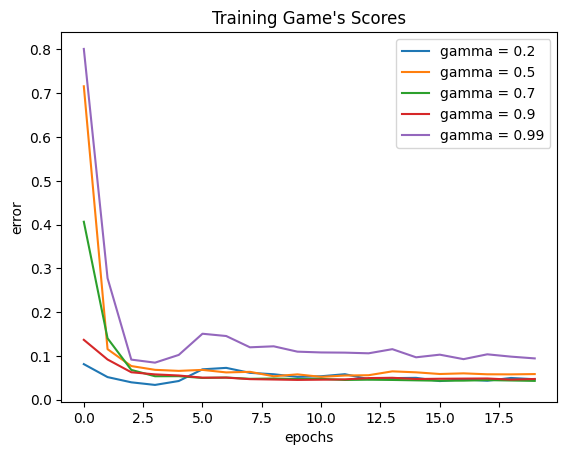

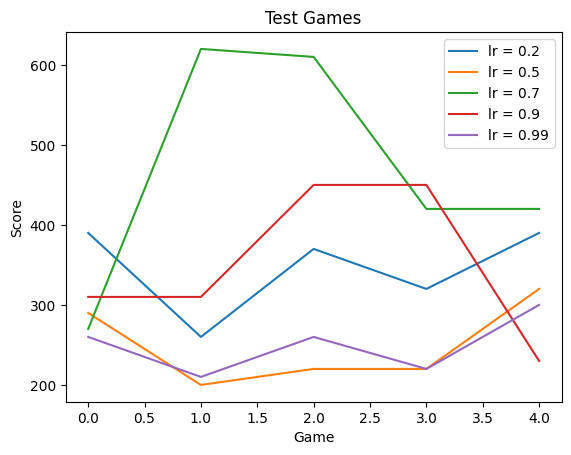

In [8]:
# plot training scores
for i in range(len(gammaAll)):
    plt.plot(trainScores[i], label = 'gamma = ' + str(gammaAll[i]))
plt.xlabel("epochs")
plt.ylabel("scores")
plt.title("Training Game's Scores")
plt.legend()
plt.show()

# plot training errrors
for i in range(len(gammaAll)):
    plt.plot(trainErrors[i], label = 'gamma = ' + str(gammaAll[i]))
plt.xlabel("epochs")
plt.ylabel("error")
plt.title("Training Game's Scores")
plt.legend()
plt.show()

# plot test scores
for i in range(len(gammaAll)):
    plt.plot(testScores[i], label = "gamma = " + str(gammaAll[i]))

plt.xlabel('Game')
plt.ylabel('Score')
plt.title('Test Games')
plt.legend()
plt.show()

# select best Gamma 
gammaBest = gammaAll[np.argmax(averageTestScores)]

Best Tau (the amount the neural net values are passed to the target net to evaluate future Q states)

In [9]:
tauAll = [0.001, 0.01, 0.1, 0.5, 1]

trainScores = []
trainErrors = []

testScores = []
averageTestScores = []

Nepochs = 20

for gamma in gammaAll:
  # initalize new game
  pacmanGame = MsPacmanGame(DQN = DQN)

  # train game
  scoreAll, errorGame = pacmanGame.train(saveName=name + "_gamma" + str(gamma), actionSelected = actionSelected, epochs=Nepochs, gamma=gammaBest, eps_start=0.9, eps_end=0.3, eps_decay=5000, tau=0.01, lr=lrBest, show=0)
  trainScores.append(scoreAll)
  trainErrors.append(errorGame)

  # test how this model works
  testScore, averageScore = testGames(pacmanGame, Ngames=5)

  print("Average score: ", averageScore)

  testScores.append(testScore)
  averageTestScores.append(averageScore)

episode:  0
Complete with score:  120.0
episode:  1
Complete with score:  190.0
episode:  2
Complete with score:  170.0
episode:  3
Complete with score:  220.0
episode:  4
Complete with score:  260.0
episode:  5
Complete with score:  190.0
episode:  6
Complete with score:  190.0
episode:  7
Complete with score:  160.0
episode:  8
Complete with score:  270.0
episode:  9
Complete with score:  400.0
episode:  10
Complete with score:  300.0
episode:  11
Complete with score:  250.0
episode:  12
Complete with score:  210.0
episode:  13
Complete with score:  270.0
episode:  14
Complete with score:  250.0
episode:  15
Complete with score:  130.0
episode:  16
Complete with score:  390.0
episode:  17
Complete with score:  210.0
episode:  18
Complete with score:  650.0
episode:  19
Complete with score:  180.0
Game ended with score:  200.0
Game ended with score:  210.0
Game ended with score:  230.0
Game ended with score:  220.0
Game ended with score:  570.0
Average score:  286.0
episode:  0
Comple

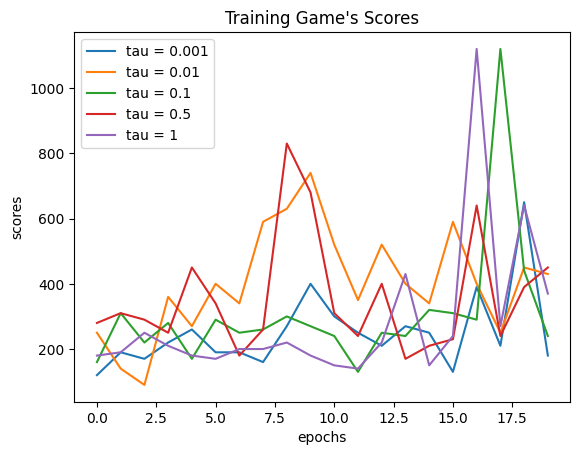

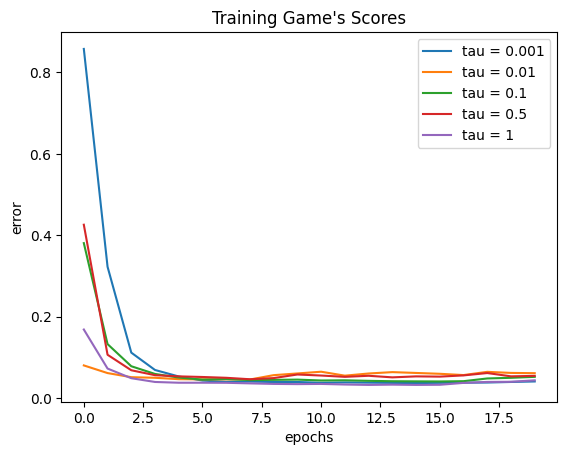

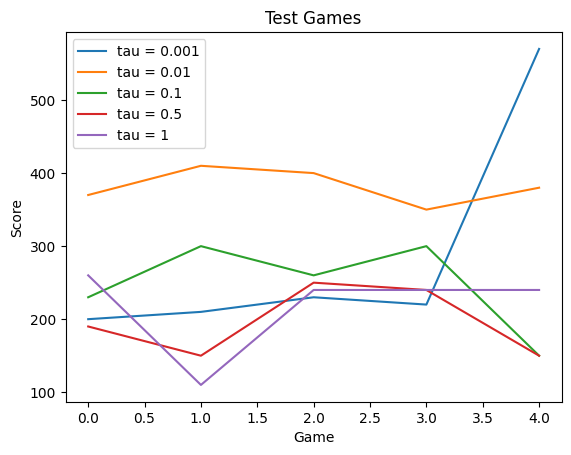

In [12]:
# plot training scores
for i in range(len(tauAll)):
    plt.plot(trainScores[i], label = 'tau = ' + str(tauAll[i]))
plt.xlabel("epochs")
plt.ylabel("scores")
plt.title("Training Game's Scores")
plt.legend()
plt.show()

# plot training errrors
for i in range(len(tauAll)):
    plt.plot(trainErrors[i], label = 'tau = ' + str(tauAll[i]))
plt.xlabel("epochs")
plt.ylabel("error")
plt.title("Training Game's Scores")
plt.legend()
plt.show()

# plot test scores
for i in range(len(tauAll)):
    plt.plot(testScores[i], label = "tau = " + str(tauAll[i]))

plt.xlabel('Game')
plt.ylabel('Score')
plt.title('Test Games')
plt.legend()
plt.show()

# select best Gamma 
tauBest = tauAll[np.argmax(averageTestScores)]

Q-Net with the best learning rate, tau and gamma will be trained for 200 epochs


In [13]:
Nepochs = 200

# initalize new game
pacmanGame = MsPacmanGame(DQN = DQN)

# train game
scoreAll, errorGame = pacmanGame.train(saveName=name + "_BEST", actionSelected = actionSelected, epochs=Nepochs, gamma=gammaBest, eps_start=0.9, eps_end=0.3, eps_decay=5000, tau=tauBest, lr=lrBest, show=0)

# test how this model works
testScore, averageScore = testGames(pacmanGame, Ngames=5)

print("Average score: ", averageScore)

episode:  0


c:\Users\janas\Documents\ece526_A3\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\janas\Documents\ece526_A3\.venv\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Complete with score:  170.0
episode:  1
Complete with score:  150.0
episode:  2
Complete with score:  270.0
episode:  3
Complete with score:  310.0
episode:  4
Complete with score:  280.0
episode:  5
Complete with score:  320.0
episode:  6
Complete with score:  300.0
episode:  7
Complete with score:  260.0
episode:  8
Complete with score:  200.0
episode:  9
Complete with score:  410.0
episode:  10
Complete with score:  190.0
episode:  11
Complete with score:  170.0
episode:  12
Complete with score:  330.0
episode:  13
Complete with score:  260.0
episode:  14
Complete with score:  250.0
episode:  15
Complete with score:  180.0
episode:  16
Complete with score:  230.0
episode:  17
Complete with score:  760.0
episode:  18
Complete with score:  350.0
episode:  19
Complete with score:  450.0
episode:  20
Complete with score:  370.0
episode:  21
Complete with score:  170.0
episode:  22
Complete with score:  190.0
episode:  23
Complete with score:  220.0
episode:  24
Complete with score:  500

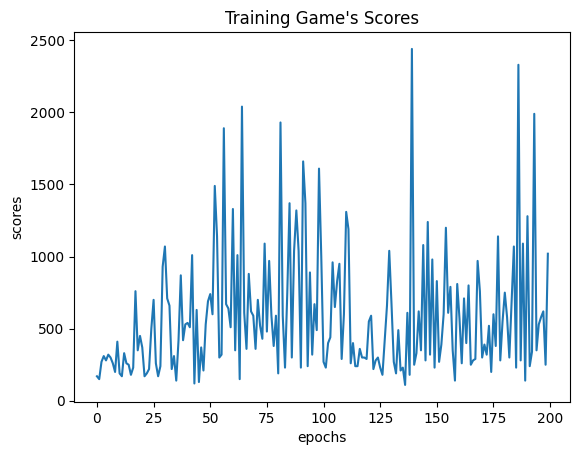

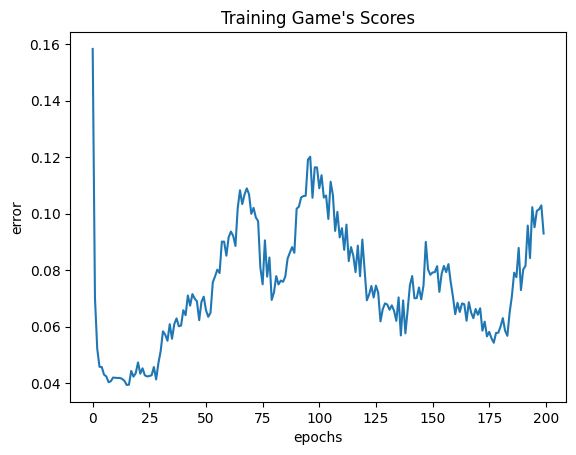

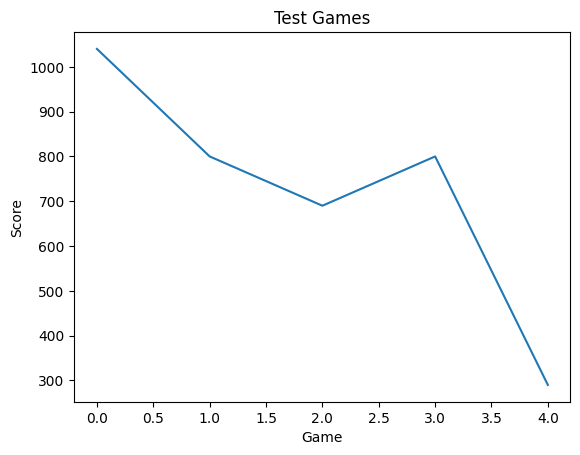

In [14]:
# plot training scores
plt.plot(scoreAll)
plt.xlabel("epochs")
plt.ylabel("scores")
plt.title("Training Game's Scores")
plt.show()

# plot training errrors
plt.plot(errorGame)
plt.xlabel("epochs")
plt.ylabel("error")
plt.title("Training Game's Scores")
plt.show()

# plot test scores
plt.plot(testScore)

plt.xlabel('Game')
plt.ylabel('Score')
plt.title('Test Games')
plt.show()
